<a href="https://colab.research.google.com/github/mhankazis/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 7**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(image, kernel, stride, padding):

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = (img_height - kernel_height) // stride + 1
    output_width = (img_width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for x in range(0, output_height):
        for y in range(0, output_width):
            region = image[x * stride:x * stride + kernel_height, y * stride:y * stride + kernel_width]
            output[x, y] = np.sum(region * kernel)

    return output

(-0.5, 417.5, 417.5, -0.5)

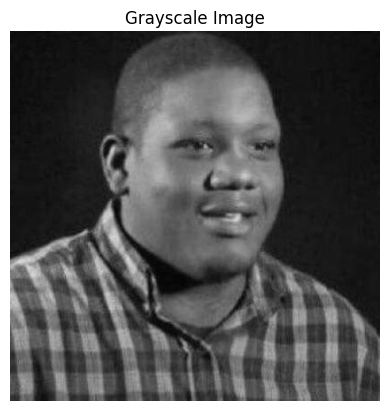

In [4]:
img = cv.imread('/content/drive/MyDrive/si ganteng.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')

## **1. Sharpen**

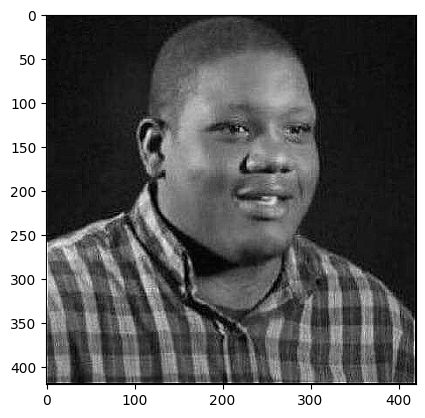

In [5]:
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])


result = convolution2d(img_gray, kernel_sharpen, 1, 2)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)

## **2. Emboss**

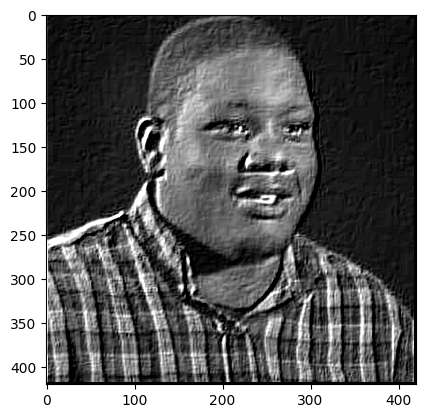

In [6]:
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])


result = convolution2d(img_gray, kernel_emboss, 1, 2)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)

## **3. Left Sobel Edge Detection**

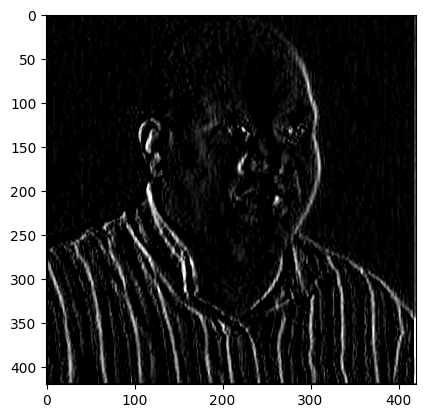

In [7]:
kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])


result = convolution2d(img_gray, kernel_lsed, 1, 2)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)

## **4. Canny Edge Detection**

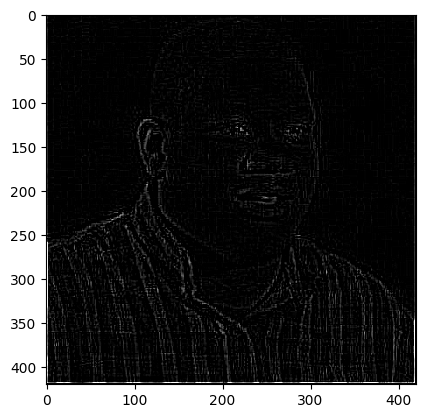

In [8]:
kernel_ced = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])


result = convolution2d(img_gray, kernel_ced, 1, 2)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)

## **5. Prewitt Edge Detection**

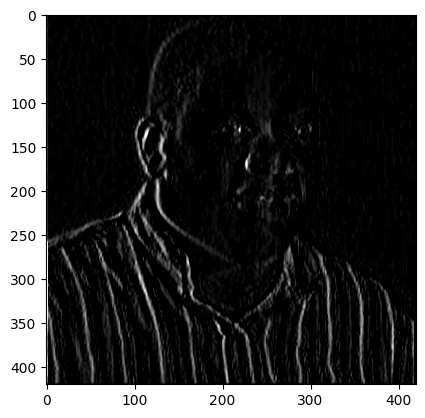

In [9]:
kernel_ped = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])


result = convolution2d(img_gray, kernel_ped, 1, 2)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)

## **6. 5x5 Gaussian Blur**

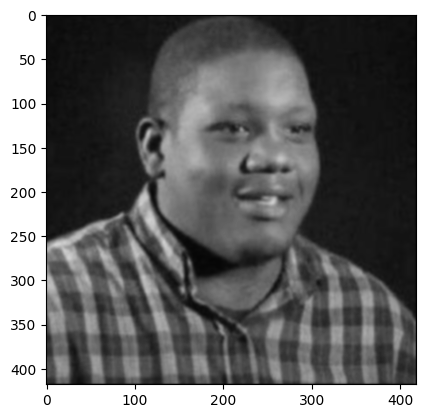

In [10]:
kernel_5x5 = (1/256) * np.array([[1, 4, 6, 4, 1],
                                  [4, 16, 24, 16, 4],
                                  [6, 24, 36, 24, 6],
                                  [4, 16, 24, 16, 4],
                                  [1, 4, 6, 4, 1]])

result = convolution2d(img_gray, kernel_5x5, 1, 2)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)

## **7. 21x21 Gaussian Blur**

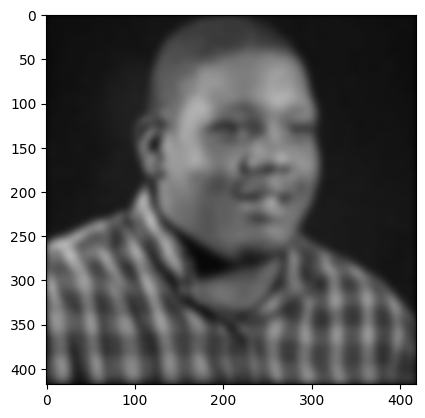

In [12]:
sigma = np.sqrt(21)
gaussian_21x21_kernel = cv.getGaussianKernel(21, sigma)
gaussian_21x21_kernel = gaussian_21x21_kernel @ gaussian_21x21_kernel.T
gaussian_21x21_output = convolution2d(img_gray, gaussian_21x21_kernel, 1, 10)
plt.imshow(gaussian_21x21_output, cmap='gray', vmin=0, vmax=255);